# Chapter 4: Getting Started with neural networks: classification and regression

## Part 3 - Including K-fold

### 4.3 Predicting house prices: a regression example

In [21]:
def listing4_23():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import boston_housing
    import numpy as np
    
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    
    print(train_data.shape, test_data.shape)
    print(train_targets[:10])
    
    # preparing the data. quantities used for normalizing the 
    # test data are computed using the training data
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std
    test_data -= mean
    test_data /= std
    
    # build model
    def build_model():
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            # End with single unit and no activation, hence it's a linear layer
            # Applying an activation function constrains the output range, 
            # hence we don't apply one to the last layer. Since the last 
            # layer is linear, it can predict any continuous value.
            layers.Dense(1)
        ])
        
        # use mse and mae for regression-type problems
        # mae is absolute value of difference between predictions and targets
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"]
        )
        return model
    
    
    # validate using K-fold validation, since we have so little data points
    k = 4
    num_val_samples = len(train_data) // k
    print(f'num of validation samples: {num_val_samples}')
    num_epochs = 100
    all_scores = []
 
    for i in range(k):
        print(f"Processing fold #{i}/{k}")
        
        # prepare validation data: data from partition #k
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        
        # prepare training data: data from all other partitions
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        
        # build the Keras model (already compiled)
        model = build_model()
        
        # train the model in silent mode
        model.fit(
            partial_train_data, 
            partial_train_targets,
            epochs=num_epochs, 
            batch_size=16, 
            verbose=0
        )
        
        # evaluate the model on validation data
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
    
    print()
    print(f"all scores:")
    for x in all_scores:
        print(f"{x:.5f}")
    print()
    
    print(f"mean: {np.mean(all_scores):.2f}")
    
    
listing4_23()

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
num of validation samples: 101
Processing fold #0/4
Processing fold #1/4
Processing fold #2/4
Processing fold #3/4

all scores:
2.06189
2.36446
2.69208
2.44892

mean: 2.39


In [22]:
# batch size: 32
def listing4_24():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import boston_housing
    import numpy as np
    
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    
    print(train_data.shape, test_data.shape)
    print(train_targets[:10])
    
    # preparing the data. quantities used for normalizing the 
    # test data are computed using the training data
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std
    test_data -= mean
    test_data /= std
    
    # build model
    def build_model():
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            # End with single unit and no activation, hence it's a linear layer
            # Applying an activation function constrains the output range, 
            # hence we don't apply one to the last layer. Since the last 
            # layer is linear, it can predict any continuous value.
            layers.Dense(1)
        ])
        
        # use mse and mae for regression-type problems
        # mae is absolute value of difference between predictions and targets
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"]
        )
        return model
    
    
    # validate using K-fold validation, since we have so little data points
    k = 4
    num_val_samples = len(train_data) // k
    print(f'num of validation samples: {num_val_samples}')
    num_epochs = 100
    all_scores = []
 
    for i in range(k):
        print(f"Processing fold #{i}/{k}")
        
        # prepare validation data: data from partition #k
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        
        # prepare training data: data from all other partitions
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        
        # build the Keras model (already compiled)
        model = build_model()
        
        # train the model in silent mode
        model.fit(
            partial_train_data, 
            partial_train_targets,
            epochs=num_epochs, 
            batch_size=32, 
            verbose=0
        )
        
        # evaluate the model on validation data
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
    
    print()
    print(f"all scores:")
    for x in all_scores:
        print(f"{x:.5f}")
    print()
    
    print(f"mean: {np.mean(all_scores):.2f}")
    
    
listing4_24()

(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
num of validation samples: 101
Processing fold #0/4
Processing fold #1/4
Processing fold #2/4
Processing fold #3/4

all scores:
2.20654
2.51789
2.33717
2.35622

mean: 2.35


(404, 13) (102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
num of validation samples: 101
Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3



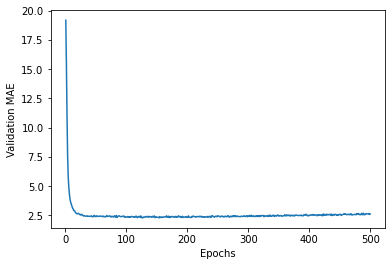

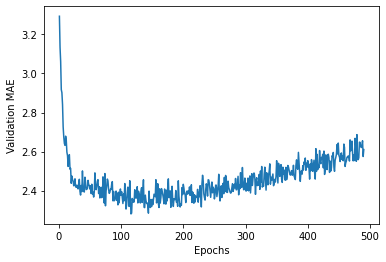

4/4 [==============================] - 0s 2ms/step - loss: 16.7691 - mae: 2.6503
test_mae_score 2.650336265563965
[8.95895]


In [26]:
# batch size: 32, epochs: 500
def listing4_25():
    import tensorflow
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.datasets import boston_housing
    import numpy as np
    import matplotlib.pyplot as plt
    
    (train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
    
    print(train_data.shape, test_data.shape)
    print(train_targets[:10])
    
    # preparing the data. quantities used for normalizing the 
    # test data are computed using the training data
    mean = train_data.mean(axis=0)
    train_data -= mean
    std = train_data.std(axis=0)
    train_data /= std
    test_data -= mean
    test_data /= std
    
    # build model
    def build_model():
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            # End with single unit and no activation, hence it's a linear layer
            # Applying an activation function constrains the output range, 
            # hence we don't apply one to the last layer. Since the last 
            # layer is linear, it can predict any continuous value.
            layers.Dense(1)
        ])
        
        # use mse and mae for regression-type problems
        # mae is absolute value of difference between predictions and targets
        model.compile(
            optimizer="rmsprop", 
            loss="mse", 
            metrics=["mae"]
        )
        return model
    
    
    # validate using K-fold validation, since we have so little data points
    k = 4
    num_val_samples = len(train_data) // k
    print(f'num of validation samples: {num_val_samples}')
    num_epochs = 500
    all_scores = []

    
    num_epochs = 500
    all_mae_histories = []
    for i in range(k):
        print(f"Processing fold #{i}")
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
             train_data[(i + 1) * num_val_samples:]],
            axis=0)
        partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples],
             train_targets[(i + 1) * num_val_samples:]],
            axis=0)
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=16, verbose=0)
        mae_history = history.history["val_mae"]
        all_mae_histories.append(mae_history)    
    
    
    print()
    
    average_mae_history = [
        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    

    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation MAE")
    plt.show()

    
    truncated_mae_history = average_mae_history[10:]
    plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation MAE")
    plt.show()
    
    
    model = build_model()
    model.fit(train_data, train_targets,
              epochs=130, batch_size=16, verbose=0)
    test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

    print("test_mae_score", test_mae_score)
    
    
    predictions = model.predict(test_data)
    print(predictions[0])
    
listing4_25()